In [84]:
from ast import literal_eval

import fitbit
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.style.use("ggplot")
import datetime
import os

import seaborn as sns
from dateutil.relativedelta import relativedelta
from dotenv import load_dotenv
from tqdm import tqdm

In [2]:
# read env
dotenv_path = "./.env"
load_dotenv(dotenv_path)

CLIENT_ID = os.environ.get("OAuth_2.0_Client_ID")
CLIENT_SECRET = os.environ.get("Client_Secret")
TOKEN_FILE = "./.token"

tokens = open(TOKEN_FILE).read()
token_dict = literal_eval(tokens)
access_token = token_dict["access_token"]
refresh_token = token_dict["refresh_token"]

In [3]:
def updatedToken(token):
    f = open(TOKEN_FILE, "w")
    f.write(str(token))
    f.close()
    return


client = fitbit.Fitbit(CLIENT_ID, CLIENT_SECRET, access_token=access_token, refresh_token=refresh_token, refresh_cb=updatedToken)

In [5]:
weights = {}
fats = {}
calories = {}
for i in range(30):
    base_date = (datetime.datetime(2019, 1, 1) + relativedelta(months=i)).date()
    end_date = (datetime.datetime(2019, 1, 1) + relativedelta(months=i + 1, days=-1)).date()
    print(base_date)
    print(end_date)
    # 体重
    weight = client.get_bodyweight(base_date=base_date, end_date=end_date)["weight"]
    for w in weight:
        weights[w["date"]] = w["weight"] / 2.2
    # 体脂肪率
    fat = client.get_bodyfat(base_date=base_date, end_date=end_date)["fat"]
    for f in fat:
        fats[f["date"]] = f["fat"]
    # カロリー
    calorie = client.time_series(resource="activities/calories", base_date=base_date, end_date=end_date)["activities-calories"]
    for c in calorie:
        calories[c["dateTime"]] = c["value"]

2019-01-01
2019-01-31
2019-02-01
2019-02-28
2019-03-01
2019-03-31
2019-04-01
2019-04-30
2019-05-01
2019-05-31
2019-06-01
2019-06-30
2019-07-01
2019-07-31
2019-08-01
2019-08-31
2019-09-01
2019-09-30
2019-10-01
2019-10-31
2019-11-01
2019-11-30
2019-12-01
2019-12-31
2020-01-01
2020-01-31
2020-02-01
2020-02-29
2020-03-01
2020-03-31
2020-04-01
2020-04-30
2020-05-01
2020-05-31
2020-06-01
2020-06-30
2020-07-01
2020-07-31
2020-08-01
2020-08-31
2020-09-01
2020-09-30
2020-10-01
2020-10-31
2020-11-01
2020-11-30
2020-12-01
2020-12-31
2021-01-01
2021-01-31
2021-02-01
2021-02-28
2021-03-01
2021-03-31
2021-04-01
2021-04-30
2021-05-01
2021-05-31
2021-06-01
2021-06-30


In [11]:
# weights

In [10]:
# fats

In [16]:
# calories

In [79]:
df = pd.DataFrame(data=pd.date_range(start="2019-1-1", end="2021-6-30", freq="D"), columns=["date"])
df["weight"] = None
df["fat"] = None
df["calorie"] = None

In [80]:
for weight in weights.keys():
    df.loc[df["date"] == datetime.datetime.strptime(weight, "%Y-%m-%d"), "weight"] = weights[weight]

for fat in fats.keys():
    df.loc[df["date"] == datetime.datetime.strptime(fat, "%Y-%m-%d"), "fat"] = fats[fat]

for calorie in calories.keys():
    df.loc[df["date"] == datetime.datetime.strptime(calorie, "%Y-%m-%d"), "calorie"] = calories[calorie]

In [81]:
df.head(100)

,date,weight,fat,calorie
0,2019-01-01,None,None,1121
1,2019-01-02,None,None,1121
2,2019-01-03,None,None,1121
3,2019-01-04,None,None,1121
4,2019-01-05,None,None,1121
...,...,...,...,...
95,2019-04-06,43.909091,22.8,1617
96,2019-04-07,43.0,None,1313
97,2019-04-08,42.909091,None,1457
98,2019-04-09,None,None,1755


In [91]:
df['weight'] = df['weight'].astype(float)
df['fat'] = df['fat'].astype(float)
df['calorie'] = df['calorie'].astype(int)

In [92]:
df.dtypes

date       datetime64[ns]
weight            float64
fat               float64
calorie             int64
dtype: object

<AxesSubplot:xlabel='date', ylabel='calorie'>

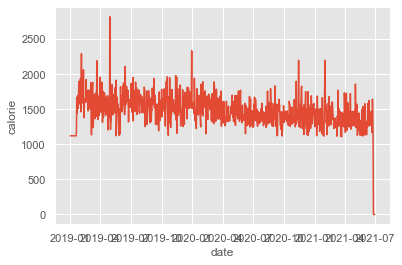

In [97]:
sns.lineplot(x="date", y="calorie", data=df)

<AxesSubplot:xlabel='date', ylabel='weight'>

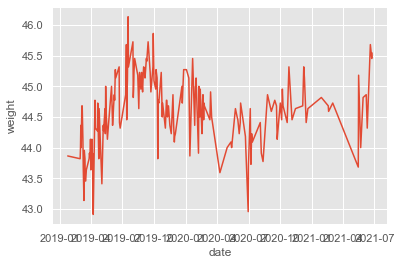

In [98]:
sns.lineplot(x="date", y="weight", data=df)

<AxesSubplot:xlabel='date', ylabel='fat'>

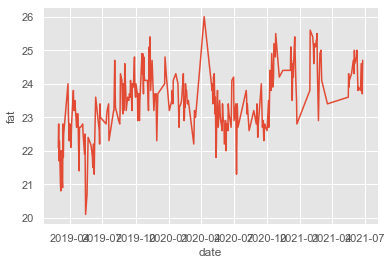

In [99]:
sns.lineplot(x="date", y="fat", data=df)

In [100]:
df.to_csv('fitbit_20190101_20210630.csv',index=False)